# Lineární regrese

V tomto notebooku se budeme zabývat využitím lineární regrese k predikci
 
Základem pro tento dokument je tutorial ze scikit-learn zaměřený na analýzu textů [zde](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html).

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation (so 0.000 is printed as 0.)

## Načtení dat

Využijeme data ze serveru Kaggle o cenách domů v oblasti Bostonu v USA [více info zde](https://www.kaggle.com/c/boston-housing).

Data jsou již vyčištěná. Proměnná, kterou chceme predikovat je `medv`.

In [5]:
df = pd.read_csv('boston.csv')
print('Shape', df.shape)
df.head()

Shape (333, 15)


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


### Příprava trénovací a testovací množiny

Využijeme [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) ze `scikit-learn`.

In [6]:
from sklearn.model_selection import train_test_split

# id zbytecne
# medv - odhadujeme cenu
X, X_test, Y, Y_test = train_test_split(df.drop(columns = ['ID', 'medv']), df['medv'], test_size=0.25, random_state=42)
print('Train X shape', X.shape)
print('Test X shape', X_test.shape)

# NORMALIZACE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

Train X shape (249, 13)
Test X shape (84, 13)


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


## Task 1 - proveďte metodu nejmenších čtverců ručně

Používejte pouze maticové operace v [numpy.linalg](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html).

* Vypočtěte odhad $\hat{\boldsymbol w}_{OLS} = (\mathbf{X}^T \mathbf X)^{-1} \mathbf X^T \boldsymbol Y$ a vypište jednotlivé koeficienty.
* Spočtěte hodnotu $\text{RSS}(\hat{\boldsymbol w}_{OLS}) = \lVert \boldsymbol Y - \mathbf X \boldsymbol w \rVert^2$.
* Pro testovací data proveďte predikce $\hat Y_i$ a porovnejte je se skutečnými hodnotami $Y_i$.
Jako míru porovnání použijte RMSE - root mean squared error definovanou pomocí vztahu $\text{RMSE} = \sqrt{\sum_{i}(Y_i - \hat Y_i)^2}$. Můžete použít implementaci [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)
* Nakreslete scatter plot hodnot $Y_i$ a $\hat Y_i$ pro testovací množinu.


In [8]:
# musime rozsirit o jednicku na zacatku
XX = np.matrix( (np.concatenate([np.ones((X.shape[0],1)) , np.array(X)], axis=1)))
YY = np.matrix(Y).T

In [9]:
XX.shape

(249, 14)

In [10]:
YY.shape

(249, 1)

[[22.88916]
 [-0.57299]
 [ 1.44468]
 [-0.10095]
 [ 1.02907]
 [-2.00221]
 [ 2.43519]
 [-0.35408]
 [-3.66577]
 [ 3.54586]
 [-2.63274]
 [-1.59352]
 [ 0.62006]
 [-4.10405]]


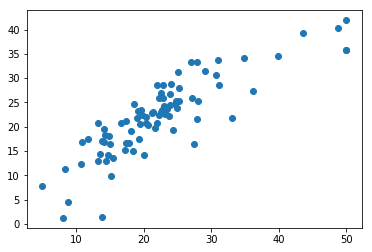

In [138]:

w_hat = (XX.T*XX).I*XX.T*YY
rss =  np.linalg.norm(YY - XX*w_hat) **2
rss_rucne = (YY - XX*w_hat).T * (YY - XX*w_hat)


XX_test = np.matrix( (np.concatenate([np.ones((X_test.shape[0],1)) , np.array(X_test)], axis=1)))

#predikce
Yhat = XX_test * w_hat

Ytest = np.matrix(Y_test)

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Y_test, Yhat))

# prevest do stejnych objektu (stejne dimenze)
YY_test = np.array(Y_test)
Yhat = np.array(Yhat)
print(w_hat)
plt.scatter(YY_test, Yhat)

## Task 2 - zopakujte metodu nejmenších čtverců s využitím scikit-learn

* Zopakujte postup z předchozího bodu s využitím třídy [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) ze `scikit-learn`.
* Porovnejte výsledky s předchozím manuálním přístupem.

W [-0.57299  1.44468 -0.10095  1.02907 -2.00221  2.43519 -0.35408 -3.66577
  3.54586 -2.63274 -1.59352  0.62006 -4.10405]
4.799532488947326


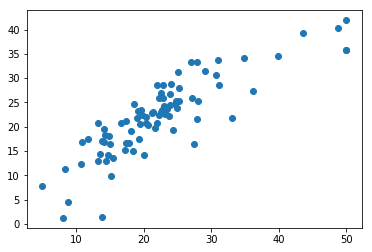

In [139]:
# Your code here
from sklearn.linear_model import LinearRegression as lr

clf = lr()
clf.fit(X,Y)
print("W", clf.coef_)

rmse = np.sqrt(mean_squared_error(Y_test, clf.predict(X_test)))
print(rmse)
plt.scatter(Y_test, clf.predict(X_test))

## Task 3 - proveďte metodu nejmenších čtverců pomocí gradientního sestupu

* Ručně implementujte gradientní sestup pro hledání $\boldsymbol w$ minimalizujícího $\text{RSS}(\boldsymbol w)$.
* Výsledný odhad $\hat{\boldsymbol w}$ porovnejte s $\hat{\boldsymbol w}_{OLS}$ získaným v předchozím bodě.

[[ 8.97834 -0.52519  0.49058 -0.69372  0.68472 -0.52812  1.68933 -0.41316
  -0.13971 -0.10709 -0.48027 -0.83925  0.51561 -1.61674]]


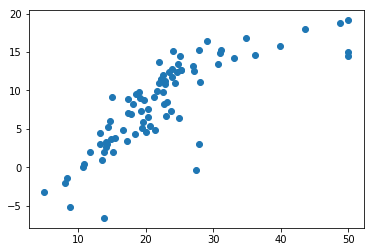

In [141]:
# Your code here

# alfa velka - uteceme z paraboly pryc nahoru !
a = 0.00000001
# pocet priznaku radky
w = np.matrix (np.zeros((XX.shape[1], 1)) )
for i in range(1,100000):
    a = a/i*i
    rss_grad = -2*XX.T*(YY - XX*w) # nemame w_hat, mame w a vyrabime...
    w = w - a*rss_grad
    
print(w.T)
Yhat = XX_test * w

Yhat = np.array(Yhat)

plt.scatter(YY_test, Yhat)


## Task 4 - zopakujte Task 3 s využitím scikit-learn

Použijte [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor).

Výsledky porovnejte s předchozími.

In [7]:
# Your code here
